In [1]:
import sys
sys.path.append('../.')
sys.path.append('../../.')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Load data**

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = 'breast'
X = pd.read_csv('../data/breast_cancer.csv')

ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc("target")]
col_list = X.columns[ind]
ct = ColumnTransformer([('scaler', StandardScaler(), col_list)], remainder='passthrough')

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0


**Fit model**

In [3]:
from sklearn.model_selection import train_test_split
from GoggleModel import GoggleModel

In [4]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)

gen = GoggleModel(
    ds_name=dataset,
    input_dim=X_train.shape[1],
    encoder_dim=64,
    encoder_l=2,
    het_encoding=True,
    decoder_dim=16,
    decoder_l=2,
    threshold=0.1,
    decoder_arch='gcn',
    graph_prior=None,
    prior_mask=None,
    device='cuda',
    beta=1,
    learning_rate=0.01,
    seed=42
)
gen.model

Goggle(
  (learned_graph): LearnedGraph(
    (act): Sigmoid()
    (threshold): Threshold(threshold=0.1, value=0)
  )
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=31, out_features=64, bias=True)
      (1): ReLU()
    )
    (encode_mu): Linear(in_features=64, out_features=31, bias=True)
    (encode_logvar): Linear(in_features=64, out_features=31, bias=True)
  )
  (graph_processor): GraphInputProcessorHomo()
  (decoder): GraphDecoderHomo(
    (decoder): Sequential(
      (0): GraphConv(
        in=16, out=8, normalization=both
        (_activation): Tanh()
      )
      (1): GraphConv(in=8, out=1, normalization=both, activation=None)
    )
  )
)

In [5]:
gen.fit(X_train)

[Epoch 100/1000, patience  0] train: 18.163, val: 17.950
[Epoch 200/1000, patience  3] train: 12.841, val: 12.762
[Epoch 300/1000, patience  2] train: 11.380, val: 11.270
[Epoch 400/1000, patience  1] train: 9.948, val: 10.171
[Epoch 500/1000, patience  1] train: 7.964, val: 8.317
[Epoch 600/1000, patience  5] train: 7.304, val: 7.721
[Epoch 700/1000, patience  3] train: 7.058, val: 7.349
[Epoch 800/1000, patience 17] train: 6.692, val: 6.944
[Epoch 900/1000, patience 10] train: 6.638, val: 6.686
[Epoch 1000/1000, patience  0] train: 6.351, val: 6.456


**Evaluate synthetic data**

In [6]:
X_synth = gen.sample(X_test)
X_synth.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,-0.993369,0.489359,-1.013852,-1.059567,-0.259933,-0.501869,-0.838748,-0.848399,-0.663317,-0.092060,...,-0.172206,-0.846202,-0.925557,-0.367072,-0.134054,-0.927447,-0.801714,-0.477142,-0.262431,1.0
1,0.341656,-1.226677,0.336293,0.414628,-0.313165,-0.656400,-0.280766,-0.082122,0.495002,-0.526740,...,-0.559081,-0.032578,0.165935,-0.247651,-0.898709,-0.428956,-0.166345,-0.015609,-0.220439,1.0
2,0.447700,1.202736,0.478462,0.403358,0.920164,2.110647,1.714186,1.308149,1.489008,1.966838,...,1.284641,0.626954,0.493463,0.800257,1.798799,2.053293,1.242301,1.989897,1.681533,0.0
3,0.604801,0.197425,0.593805,0.608878,-0.334521,-0.046747,0.250913,0.264404,-0.273586,-0.744736,...,-0.474608,0.573047,0.588884,-0.499448,0.276651,-0.003619,0.319476,-0.484394,-0.049326,1.0
4,-1.417739,-1.499318,-1.427057,-1.500872,-0.685479,-0.983457,-0.774676,-1.294458,0.062021,-0.435799,...,-1.552947,-1.296913,-1.395004,-0.995686,-0.690157,-0.851900,-1.026156,-0.330292,-0.449183,1.0


In [7]:
res = gen.evaluate_synthetic(X_synth, X_test)
print(f'Quality: {res[0]:.3f}')
print(f'Detection: {res[2]:.3f}')
print(f'Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}')

Evaluating classification performance...
Evaluating classification performance...
Evaluating classification performance...
Quality: 0.625
Detection: 0.712
Performance on real: 0.989, on synth: 0.914


**Generate TSNE plots**

In [8]:
X_test['label'] = 'Original'
X_synth['label'] = 'Synthetic'

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df['label']
x_data = concat_df.drop(['label', 'target'], axis=1)

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

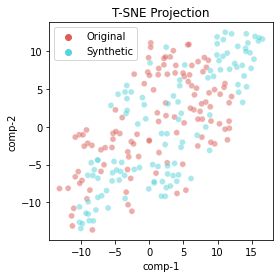

In [10]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2), alpha=0.5,
                data=df).set(title=f"T-SNE Projection")
plt.xlabel('comp-1')
plt.ylabel('comp-2')
plt.legend()

plt.show()

**Visualise adjacency matrix**

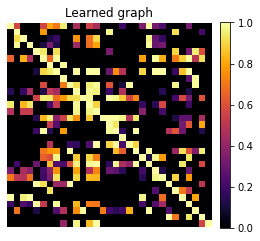

In [11]:
adj_matrix = gen.model.learned_graph(100).cpu().detach().numpy()
plt.figure(figsize=(4, 4))
im = plt.imshow(adj_matrix, cmap='inferno', interpolation='nearest', vmin=0, vmax=1.0)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Learned graph')
plt.axis('off')
plt.show()